In [22]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [23]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2005', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
22338,2005,AY,"Fernando,Ferrer",2005-12-19,Corporation,New York,NY,10011,0.0,0,0,0,23,Other,Other: explntion
22339,2005,AY,"Fernando,Ferrer",2005-05-20,Corporation,New York,NY,10018,0.0,0,0,0,35,Other,Other: explntion
22340,2005,BB,"Anthony,Weiner",2005-02-23,Limited Liability Company,New York,NY,10021,0.0,0,0,0,4660,Office Rent,Office Rent
22341,2005,BB,"Anthony,Weiner",2005-02-23,Limited Liability Company,New York,NY,10021,0.0,0,0,0,7363,Office Rent,Office Rent
22342,2005,BB,"Anthony,Weiner",2005-02-23,Limited Liability Company,New York,NY,10021,0.0,0,0,0,340,Office Rent,Office Rent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37872,2005,BB,"Anthony,Weiner",2005-09-15,Individual,Brooklyn,NY,11224,0.0,0,0,0,182,Campaign Workers Salaries,Campgn Wrkrs $$
37873,2005,605,"Michael,Bloomberg",2005-11-29,Other,Queens,NY,11105,0.0,0,0,0,371,Office Expenses,Office Expenses
37874,2005,605,"Michael,Bloomberg",2005-11-29,Other,Queens,NY,11105,0.0,0,0,0,185,Office Expenses,Office Expenses
37875,2005,B6,"C. Virginia,Fields",2005-07-11,Individual,New York,NY,10028,0.0,0,0,0,250,Petition Expenses,Petition Expns.


In [24]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
Contributions_df['zipcode'] = Contributions_df['zipcode'].apply(str)

In [25]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [26]:
Contributions_df.head()

amount  matchamt  \
zipcode date       contributiontype city          state                     
0       2002-07-08 Other            New York      NY      500.0         0   
        2002-09-06 Corporation      New York      NY        0.0         0   
        2002-09-16 Other            Santa Barbara CA        0.0         0   
        2002-10-09 Individual       New York      NY     1000.0       250   
        2002-10-10 Individual       New York      NY      100.0       100   

                                                         totalamount  \
zipcode date       contributiontype city          state                
0       2002-07-08 Other            New York      NY             500   
        2002-09-06 Corporation      New York      NY               0   
        2002-09-16 Other            Santa Barbara CA               0   
        2002-10-09 Individual       New York      NY            1250   
        2002-10-10 Individual       New York      NY             200   

                                                         expenditure_amount  
zipcode date       contributiontype city          state                      
0       2002-07-08 Other            New York      NY                      0  
        2002-09-06 Corporation      New York      NY                      6  
        2002-09-16 Other            Santa Barbara CA                     20  
        2002-10-09 Individual       New York      NY                      0  
        2002-10-10 Individual       New York      NY                      0

In [27]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,2002-07-08,Other,New York,NY,500.0,0,500,0
1,0,2002-09-06,Corporation,New York,NY,0.0,0,0,6
2,0,2002-09-16,Other,Santa Barbara,CA,0.0,0,0,20
3,0,2002-10-09,Individual,New York,NY,1000.0,250,1250,0
4,0,2002-10-10,Individual,New York,NY,100.0,100,200,0
...,...,...,...,...,...,...,...,...,...
26042,987,2005-10-17,Individual,Carolina,PR,1500.0,0,1500,0
26043,99504,2005-03-10,Individual,Anchorage,AK,1.0,0,1,0
26044,99508,2004-06-14,Individual,Anchorage,AK,250.0,0,250,0
26045,99577,2005-05-10,Individual,Eagle River,AK,200.0,0,200,0


In [28]:
from sklearn.preprocessing import LabelEncoder
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,34,8,839,32,500.0,0,500,0
1,0,71,4,839,32,0.0,0,0,6
2,0,77,8,1098,4,0.0,0,0,20
3,0,91,5,839,32,1000.0,250,1250,0
4,0,92,5,839,32,100.0,100,200,0


In [29]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               1699
date                  1070
contributiontype        12
city                  1403
state                   52
amount                 689
matchamt               290
totalamount            951
expenditure_amount    2781
dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [32]:
regr = RandomForestRegressor()

In [33]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred = regr.predict(X_test)
print(len(y_pred))

7815


In [35]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.7383375396649117


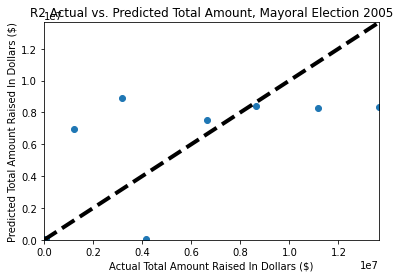

In [36]:
# %matplotlib inline
print(r_squared)
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2 Actual vs. Predicted Total Amount, Mayoral Election 2005')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../Resources/Predicted_Total_Amount_Regression_2005.png')

In [37]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [39]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [40]:

pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
996,4775,20,4105,165,0.0,0,85,0.00
998,2440,16,944,132,0.0,0,694,0.00
1439,4692,32,995,145,0.0,0,14287,0.00
1438,610,4,840,8,0.0,0,25,0.00
571,867,8,1220,32,0.0,0,8404,0.00
...,...,...,...,...,...,...,...,...
22,61217,491,78027,2976,97785.0,18116,498592,165682.46
23,66148,513,83061,3168,103260.0,19795,507983,182941.16
58,78784,588,102358,3904,121025.0,25700,6555853,211433.23
